# Project: TMDB-Movies


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. To make it clear about what I am going to do, I will start by cleaning the data, droping the columns that I will not use, droping the rows with null values, and also the duplicated values. After that, I will explore the data alittle bit to Know more about data such as the numbers of rows and columns, distribution of data, etc.
But first of all, there is some questions that I really want answer and make sure about it:
*  What is the relation between the popularity and voting?
* Is there any connection between budget and revenue?
* What is the number of movies that are released each year?
* How runtime changed over years?
* The counts of every genre?

### Loading the data

In [253]:
# import statements for all of the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

First of all, I should read the CSV file that has the data set so I am going to use pd.read_csv to store the data set in variable df. next, I going to use head() to have an overview of the data and how it looks like.

In [254]:
# loading the CSV file using read_csv and showing the first 5 rows of the data using .head()
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After having an overview of the data set, I want to know the exact number of rows and columns before doing any cleaning to the data to compare it after cleaning the data and dropping the wasted values for my analysis.

In [255]:
# make a brief idea about the number of row and columns
df.shape

(10866, 21)

### Data Cleaning 

Now I have an overview of the data, but I think it's not clear and enough to me, as I don't know the data type of each column. Also not all the columns were visible to me using the head method because of the width of the columns. So I will use info() to complete this missing idea.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

keywords column can't be seeing in head up at the previous cell, so I want to make sure what it showing 

In [257]:
df.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [258]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

There are some columns that I will not need for my analysis. So,  I think it's will be better if I drop it to make my data cleaner and at the same time, this additional data will not be useful to answer my questions.

In [259]:
# this function is taking list of columns that I want to drop and the name of the dataframe
def delet_columns(lst, data):
    for i in lst:
        if i in data.columns:
            data.drop([i], inplace= True, axis=1)
        else:
            print(i, "is not in the data columns")
            print(data.columns)
    

In [260]:
# droping the columns that I will not be using in my analysis
delet_columns(["id", "imdb_id", "homepage", "tagline", "keywords", "overview", "production_companies", "release_date",  "budget_adj", "revenue_adj", "director", "cast"], df)

In [261]:
# changing the original_title to movie, because it describe the column and shorter
df.rename(columns={"original_title":"movie"}, inplace=True)

In [262]:
# showing the data after droping the columns and changing the original_title
df.head()

,popularity,budget,revenue,movie,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


Now I think the data set is a little bit better, but I also want to make sure that there is no null value in the data.

In [263]:
# checking for NaN in any column
df.isnull().sum()

popularity       0
budget           0
revenue          0
movie            0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

looking at the output in the previous cell, there are 23 null values in the genres column, so I think it will be better if I drop these rows from the data set. It will not make a big difference to the data.

In [264]:
# This function drops null values if it exists
def drop_null(data):
    null_count = df.isnull().sum().sum()
    # checking for null values
    if null_count != 0:
        print(f"There is about {null_count} rows that have null value and it will be deleted")
        # drop rows that have NaN value
        data.dropna(inplace= True)
        print("null values are deleted")
    else:
        print("There is no null values\n")
    
    print(data.isnull().sum())

In [265]:
drop_null(df)

There is about 23 rows that have null value and it will be deleted
null values are deleted
popularity      0
budget          0
revenue         0
movie           0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64


Also, I need to check for duplicate values and drop them if it exists.

In [266]:
# This function drops dupicated values if it exists
def drop_duplicates(data):
    d_count = df.duplicated().sum()
    # checking for duplicated rows
    if d_count != 0:
        print(f"There is about {d_count} rows that are duplicated")
        # drop the duplicate rows
        data.drop_duplicates(inplace= True)
        print("duplicated rows are deleted")
    else:
        print("There is no duplicates\n")
    
    # make sure that duplicated row is deleted
    print(df.duplicated().sum())

In [267]:
drop_duplicates(df)

There is about 1 rows that are duplicated
duplicated rows are deleted
0


I need to make sure that all the movies in the data set are working, I mean that the runtime of the movie is **greater than 0**. So, I think if there is any movie with runtime equal to 0, It's better to drop it

In [268]:
df.runtime.sort_values()

616       0
6934      0
410       0
5695      0
1849      0
       ... 
6181    561
6176    566
2722    705
4041    877
3894    900
Name: runtime, Length: 10842, dtype: int64

In [269]:
len(df.query("runtime == 0"))

30

In [270]:
df.drop(df[df.runtime == 0].index, inplace=True)
len(df.query("runtime == 0"))

0

In [271]:
df.runtime.sort_values()

7905       2
4883       2
10754      2
10550      2
5993       3
        ... 
6181     561
6176     566
2722     705
4041     877
3894     900
Name: runtime, Length: 10812, dtype: int64

Now it's clear to me that all movies are working correctly 

In [272]:
df.head()

,popularity,budget,revenue,movie,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Quick exploration for the data

In [273]:
# geting the number of rows and columns after cleaning the data
df.shape

(10812, 9)

In [274]:
# sorted years
np.sort(df.release_year.unique())

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [275]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10812.000000,1.081200e+04,1.081200e+04,10812.000000,10812.000000,10812.000000,10812.000000
mean,0.648730,1.469493e+07,4.002213e+07,102.421846,218.369404,5.975379,2001.288938
std,1.001976,3.097338e+07,1.172614e+08,30.871363,576.886018,0.934122,12.819746
min,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.209045,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.385298,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.716608,1.550000e+07,2.439961e+07,112.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [276]:
# this mean that there is some budget that are duplicated in more than one movie 
df.budget.nunique()

557

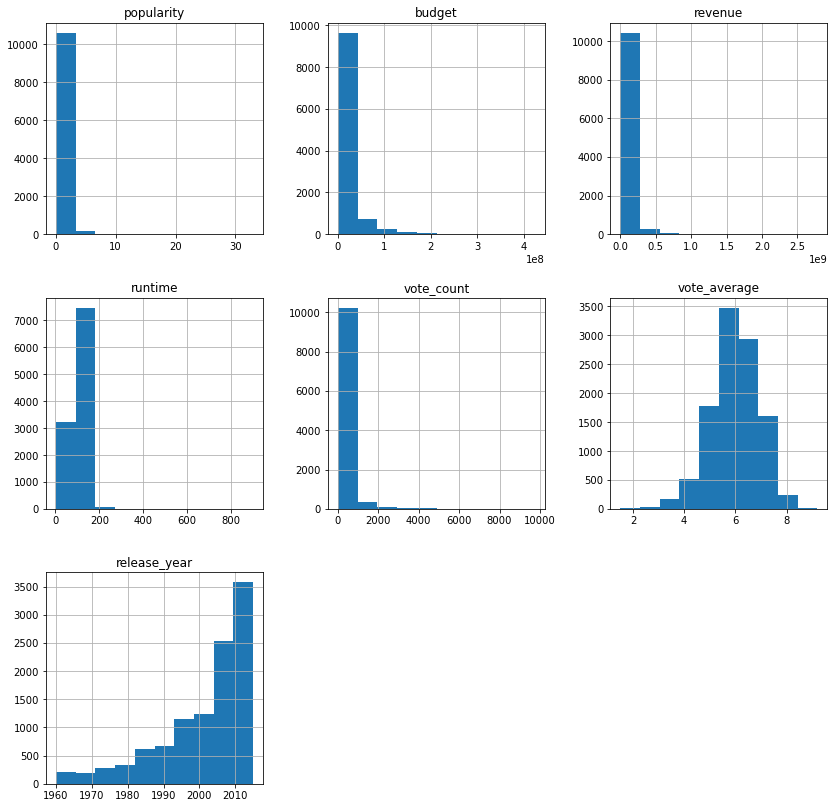

In [277]:
df.hist(figsize=(14, 14));

the previous histograms showing the distribution of the data, and it show that most of movies are released after 2000 which suppose that most of the companies started to care about producing more movies in this period of time. On the other hand the destribution of data shows that the popularity of the movies are depending on the vote count.However, popularity not depending on the the vote average.

### Research Question 1: What is the relation between the popularity and voting?  

In [278]:
# Finding the movies with the highest and the lowest popularity
pop_max = df.query(f"popularity == {df.popularity.max()}")
pop_min = df.query(f"popularity == {df.popularity.min()}")

In [279]:
pop_max

,popularity,budget,revenue,movie,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [280]:
pop_min

,popularity,budget,revenue,movie,runtime,genres,vote_count,vote_average,release_year
6181,0.000065,0,0,"North and South, Book I",561,Drama|History|Western,17,6.0,1985


In [281]:
def figure(column, title, xlabel, ylabel):
    col_max = pop_max[column].values[0]
    col_min = pop_min[column].values[0]
    
    plt.bar([1, 2], [col_max, col_min], tick_label=['High', 'Low'], alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

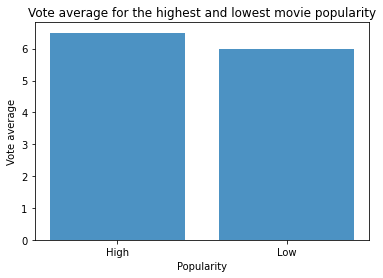

In [282]:
figure("vote_average", "Vote average for the highest and lowest movie popularity", "Popularity", "Vote average")

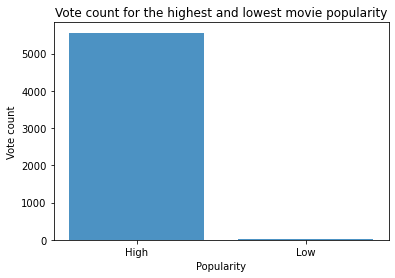

In [283]:
figure("vote_count", "Vote count for the highest and lowest movie popularity", "Popularity", "Vote count")

Text(0, 0.5, 'Popularity')

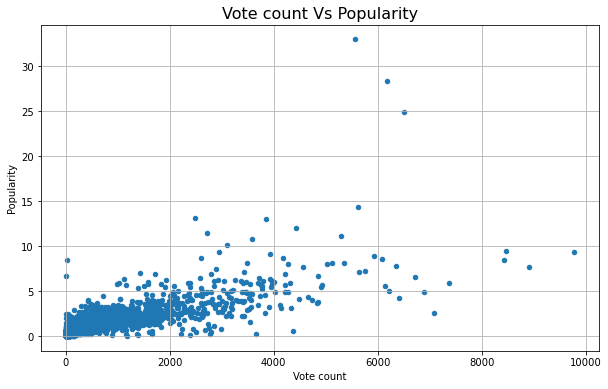

In [284]:
df.plot(kind="scatter", x = "vote_count", y ="popularity", grid=True, figsize=(10, 6))
plt.title("Vote count Vs Popularity", fontsize=16)
plt.xlabel("Vote count")
plt.ylabel("Popularity")

### Research Question 2: Is there any connection between budget and revenue?

Text(0, 0.5, 'Revenue')

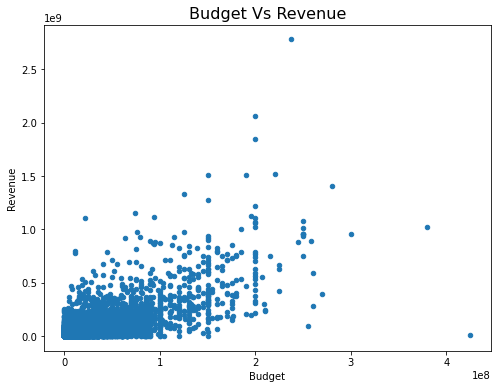

In [285]:
df.plot(kind="scatter", x= "budget", y= "revenue", figsize=(8, 6))
plt.title("Budget Vs Revenue", fontsize=16)
plt.xlabel("Budget")
plt.ylabel("Revenue")

### Research Question 3: What is the number of movies that are released each year?

<AxesSubplot:title={'center':'Years Vs Number of Movies'}, xlabel='Release year', ylabel='Number of movies'>

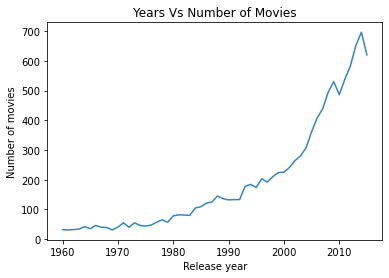

In [286]:
temp = df.groupby("release_year").count()["movie"]
temp.plot(title ="Years Vs Number of Movies", xlabel="Release year", ylabel="Number of movies", alpha=0.9)

In [287]:
# The most movies released was in 2014
df.release_year.mode()[0]

2014

In [288]:
# count of movies that released in 1960
count_past = len(df.query("release_year == 1960"))
count_past

32

In [289]:
# count of movies that released in 2015
count_present = len(df.query("release_year == 2015"))
count_present

620

In [290]:
# the difference between past and present
diff = count_present - count_past
diff

588

### Research Question 4: How runtime changed over years?

In [291]:
time_avg = pd.DataFrame(df.groupby("release_year").runtime.mean())

Text(0, 0.5, 'Runtime')

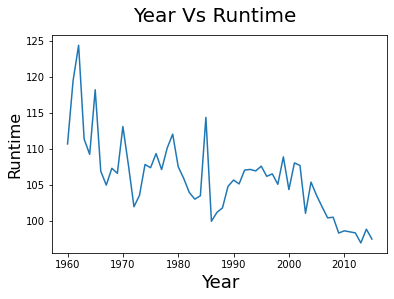

In [292]:
fig = plt.figure()
plt.plot(time_avg)
fig.suptitle('Year Vs Runtime', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Runtime', fontsize=16)

### Research Question 5: The counts of every genre?

In [293]:
# concatenate all the raws of genre column with "|" in between
genres = "|".join(df.genres.values)

In [294]:
# make a series of genres which have only one genre in each cell
genres_series = pd.Series(genres.split("|"))
genres_series

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
26889            Mystery
26890             Comedy
26891             Action
26892             Comedy
26893             Horror
Length: 26894, dtype: object

In [295]:
# count each genre
counts = genres_series.value_counts(ascending=True)
counts

TV Movie            164
Western             165
Foreign             187
War                 270
History             334
Music               401
Documentary         517
Animation           699
Mystery             808
Fantasy             915
Science Fiction    1228
Family             1229
Crime              1353
Adventure          1470
Horror             1629
Romance            1705
Action             2382
Thriller           2905
Comedy             3782
Drama              4751
dtype: int64

Text(0, 0.5, 'Genre')

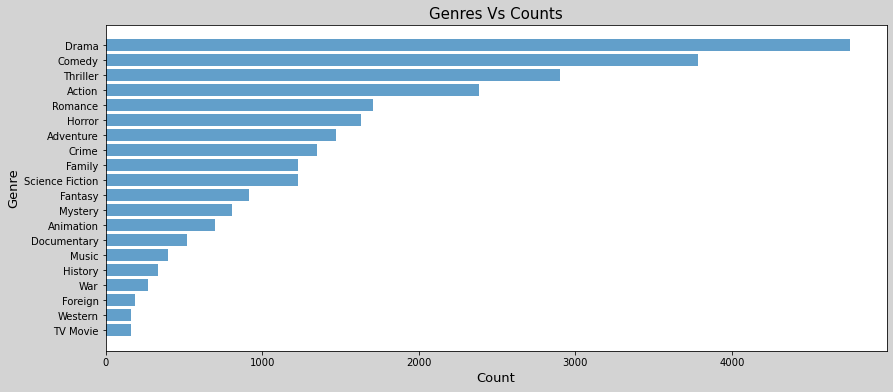

In [296]:
plt.figure(figsize=(14, 6), facecolor="lightgray")
plt.barh(counts.index, counts, alpha=0.7)
plt.title("Genres Vs Counts", fontsize=15)
plt.xlabel("Count", fontsize=13)
plt.ylabel("Genre", fontsize=13)

### Research Question 6: What is the highest ten movies in terms of budget, revenue, runtime?

In the next 3 plots, I will display the highest 10 movies in terms of budget, revenue, and runtime.
I also want to make it clear if the movie with a high budget will return a benefit such as high revenue, because, according to Research Question 7: There is a positive correlation between budget and revenue.

In [297]:
# defining a function that will make a plot to make the highest 10 of something such as movies in terms of something else
def highest_ten(plot_title, x_label, y_label):
    # make a data frame with x_label that is sorted from highest to lowest
    temp = pd.DataFrame(df[x_label].sort_values(ascending = False))
    
    # appending the y_label column, each row with its index to be sorted as the same as x_label column
    temp[y_label] = df[y_label]
    
    ylabel = list(temp[y_label][:10])[::-1]
    xlabel = list(temp[x_label][:10])[::-1]
    
    plt.plot(xlabel, ylabel, color = "blue", marker="o", linestyle="-", linewidth=2, markersize=9, alpha=0.6)
    plt.title(plot_title)
    plt.xlabel(x_label.title())
    plt.ylabel(y_label.title())

### Display: The highest 10 movies with the highest budgets

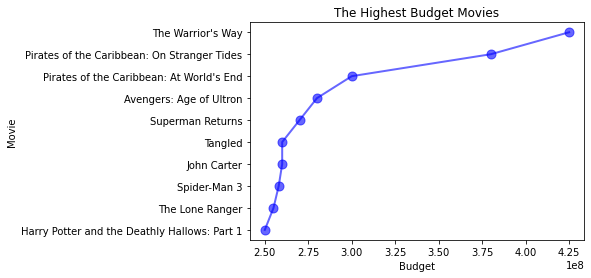

In [298]:
highest_ten("The Highest Budget Movies", "budget", "movie")

According to the previous graph, the highest movie in terms of budget is **The Warrior's Way**.

### Display: The highest 10 movies with the highest revenues

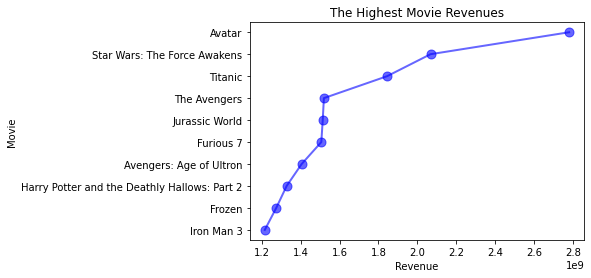

In [299]:
highest_ten("The Highest Movie Revenues", "revenue", "movie")

According to the graph the highest movie in terms of revenue is **Avatar**

### Display: The highest 10 movies with the highest runtime

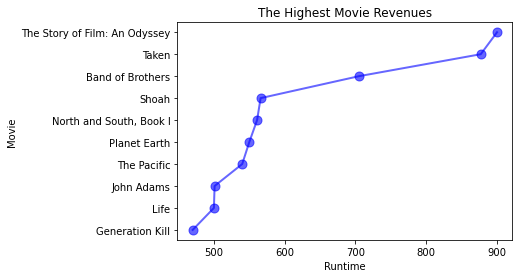

In [300]:
highest_ten("The Highest Movie Revenues", "runtime", "movie")

According to the graph the highest movie in terms of runtime is **The Story of Film: An Odyssey**

<a id='conclusions'></a>
## Conclusions

>The graphs in Research Question 1 shows that popularity not depending on vote average. because it seems that vote average was approximately equal, despite that the coparison was between highest and lowest popularity. However, there is a positive correlation between vote count and popularity.

>In Research Question 2 it seems that there is a positive correlation between the budget and the revenue.

>The number of movies released in the year is increased over the years from the start in 1960. At this period of time there were only 32 movies released, However, In 2015 this number increased to be 620 which is a big difference from the past.

>The plot in Research Question 4 shows that the runtime of the movies decreased over years.

>In Research Question 5 the bar shows that the most genres used in movies over the years were Drama and Comedy.

>Looking at the plot of the highest budget movies, we can see that **The Warrior's Way** had the highest budget. On the other hand, the highest revenue plot shows that the highest one is **Avatar**. In addition, there is one movie that ranked in the highest ten movies at budget and revenue. This movie was **Avengers: Age Of Ultron**. 

### Limitations

>In Research Question 2 it seems that there is a positive correlation between budget and revenue. In addition, looking at the highest budget movies and the highest revenue movies, Avengers: Age Of Ultron was the only movie that appeared in both of them which tells us that it's not necessary the movie with a high budget has to get high revenue. Also, another thing that prove this theory, Harry Potter and the Deathly Hallows: part 1 was one of the highest movies in the budget, but in contrast with Harry Potter and the Deathly Hallows: part 2, part 2 was higher in revenue.